# Jonathan Halverson
# Monday, March 14, 2016
# Difference of Two Means

### We consider the weight of babies as a function of whether their mother smoked. The data were collected in North Carolina.

In [37]:
import numpy as np
import pandas as pd
df = pd.read_csv('nc.csv')

In [38]:
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
2,19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
3,21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white


In [39]:
df.count()

fage               829
mage              1000
mature            1000
weeks              998
premie             998
visits             991
marital            999
gained             973
weight            1000
lowbirthweight    1000
gender            1000
habit              999
whitemom           998
dtype: int64

In [40]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


### Make  a Series out of the weight column and introduce shorthand notations:

In [41]:
w = df.weight
nonsmoker = df.habit == 'nonsmoker'
smoker = df.habit == 'smoker'

### Below we plot normalized histograms of baby weights for the two groups:

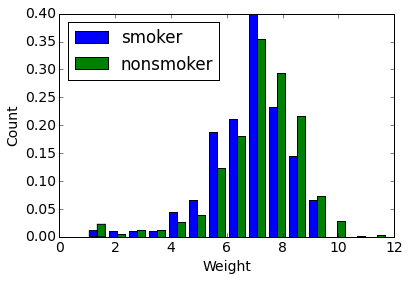

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

n, bins, patches = plt.hist((w[smoker], w[nonsmoker]), label=('smoker', 'nonsmoker'), bins=15, normed=True)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend(loc='upper left')

In [43]:
smoke_mean = w[smoker].mean()
smoke_std = w[smoker].std()
smoke_n = w[smoker].size
nonsmoke_mean = w[nonsmoker].mean()
nonsmoke_std = w[nonsmoker].std()
nonsmoke_n = w[nonsmoker].size
print smoke_mean, nonsmoke_mean
print smoke_std, nonsmoke_std
print smoke_n, nonsmoke_n

6.82873015873 7.14427262314
1.38617977716 1.51868060611
126 873


### We see the mean weight is higher for nonsmokers.

In [44]:
SE = np.sqrt(smoke_std**2 / smoke_n + nonsmoke_std**2 / nonsmoke_n)
print SE

0.133760491907


In [45]:
T = (nonsmoke_mean - smoke_mean) / SE
print T

2.35901094493


In [46]:
from scipy.stats import t
p_value = 2 * (1.0 - t.cdf(T, min(smoke_n, nonsmoke_n) - 1))
print p_value, p_value > 0.05

0.0198736284649 False


### Below use the ttest method in scipy.stats. The test measures whether the average (expected) value differs significantly across samples. When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

In [47]:
import scipy.stats
t_stat, p_value = scipy.stats.ttest_ind(w[smoker], w[nonsmoker], equal_var=False)
print t_stat, p_value

-2.35901094493 0.0194505564437


### Conclusion: we reject the null hypothesis in favor of the alternative. That is, smoking does affect baby weight. The population is all newborn babies in North Carolina.